### 3) gpu 사용법

In [26]:
import torch

#gpu 사용 가능 여부
print(torch.cuda.is_available())
#  True

#gpu 장치의 인덱스
print(torch.cuda.current_device())
#  0

# 사용가능한 gpu 장치수
print(torch.cuda.device_count())
#  1

#  gpu의 이름
print(torch.cuda.get_device_name(0))

True
0
1
NVIDIA GeForce GTX 1050


In [27]:
import torch

# Default CUDA device
cuda = torch.device('cuda')

# 텐서 자료를 gpu에 저장
a = torch.tensor([1, 2], device=cuda)
b = torch.tensor([1, 2]).cuda()
c = torch.tensor([1, 2]).to(device=cuda)

print(a)
print(b)
print(c)

tensor([1, 2], device='cuda:0')
tensor([1, 2], device='cuda:0')
tensor([1, 2], device='cuda:0')


In [28]:
#사용하지 않는 텐서 정리
torch.cuda.empty_cache()

### 4) wine 데이터셋

In [29]:
from sklearn.datasets import load_wine

wine = load_wine()

In [30]:
import pandas as pd

pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [31]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
#독립변수
X = wine.data

#종속변수
y = wine.target

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
import torch

# 학습용 데이터를 텐서로 변환
X_train = torch.from_numpy(X_train).float()
#              memory => gpu
y_train = torch.from_numpy(y_train).long()

# 검증용 데이터를 텐서로 변환
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [35]:
#텐서를 gpu로 옮기고

X_train=X_train.cuda()
y_train=y_train.cuda()

X_test=X_test.cuda()
y_test=y_test.cuda()

#       .cuda => gpu로 이동
#       .cpu => cpu로 이동

In [36]:
from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수의 텐서를 합침
train = TensorDataset(X_train, y_train)
print(train[0])

# 미니배치로 분할
train_loader = DataLoader(train, batch_size=16, shuffle=True)
#                                   미니배치

(tensor([1.2600e+01, 1.3400e+00, 1.9000e+00, 1.8500e+01, 8.8000e+01, 1.4500e+00,
        1.3600e+00, 2.9000e-01, 1.3500e+00, 2.4500e+00, 1.0400e+00, 2.7700e+00,
        5.6200e+02], device='cuda:0'), tensor(1, device='cuda:0'))


In [37]:
import torch.nn as nn
import torch.nn.functional as F

# 신경망 구성
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 96) # input 13, output 96
        self.fc2 = nn.Linear(96, 72)
        self.fc3 = nn.Linear(72, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)

        # softmax 함수의 결과값에 log 적용
        # dim=0 행방향, 1 열방향
        # dim=0, row에서 최대값을 구하는 방식
        return F.log_softmax(x, dim=0)

# 인스턴스 생성
model = Net().cuda()
#       모델 => gpu

In [38]:
import torch.optim as optim
from torch.autograd import Variable

# 손실함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화함수
optimizer = optim.SGD(model.parameters(), lr=0.001)
#                  롹률적 경사 하강 기법      학습률

# 학습 시작
for epoch in range(500):
    total_loss = 0
#       손실의 총합
    for train_x, train_y in train_loader:
#                미니배치(16)
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)

        #텐서를 gpu로 이동시킴
        train_x=train_x.cuda()
        train_y=train_y.cuda()        

        # 경사 초기화
        optimizer.zero_grad()
#                   가중치 weight, biass 초기화
        # 순전파 계산
        output = model(train_x)

        # 오차계산
        loss = criterion(output, train_y)

        # 역전파 계산
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

        # 누적 오차 계산
        total_loss += loss.data

    # 50회 반복마다 누적오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)

50 tensor(5.8381, device='cuda:0')
100 tensor(6.1875, device='cuda:0')
150 tensor(5.9707, device='cuda:0')
200 tensor(5.8341, device='cuda:0')
250 tensor(6.3474, device='cuda:0')
300 tensor(6.0601, device='cuda:0')
350 tensor(5.9751, device='cuda:0')
400 tensor(5.7817, device='cuda:0')
450 tensor(5.9418, device='cuda:0')
500 tensor(5.9349, device='cuda:0')


In [39]:
# 계산 그래프 구성
X_test, y_test = Variable(X_test), Variable(y_test)

# 출력값 계산
result = torch.max(model(X_test).data, 1)[1]
#                       확률 최대값

# 모형의 정확도 측정
# gpu에 저장된 텐서를 cpu로 이동시킴
y_test=y_test.cpu()
result=result.cpu()

accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력
accuracy

0.6944444444444444

### 5) mnist 데이터셋

In [54]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
X_train.shape
# 샘플수 , 가로, 세로

(60000, 28, 28)

In [57]:
X_train= X_train.reshape(-1,784)
X_test= X_test.reshape(-1,784)

X_train=X_train/255.        # 0 ~ 255 => 0.0 ~ 1.0
X_test=X_test/255.

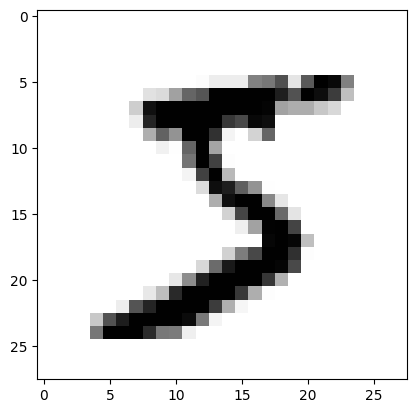

In [58]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.imshow(X_train[0].reshape(28,28),cmap=cm.gray_r)

plt.show()

In [59]:
import torch

# 학습용 데이터 텐서 변환

# from_numpy() 넘파이배열을 텐서로 변환
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.astype('int32')).long()

# 검증용 데이터 텐서 변환
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.astype('int32')).long()

# 변환된 텐서의 샘플수 확인
print(X_train.shape)
print(y_train.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [60]:
X_train=X_train.cuda()
y_train=y_train.cuda()

X_test=X_test.cuda()
y_test=y_test.cuda()

In [61]:
from torch.utils.data import DataLoader, TensorDataset

# 독립변수와 종속변수 텐서를 합침
train = TensorDataset(X_train, y_train)

# 미니배치 분할
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [62]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x,dim=0)

model = Net().cuda()

In [63]:
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

# 손실함수
criterion = nn.CrossEntropyLoss()

# 최적화함수
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    total_loss = 0
    for X_train, y_train in train_loader:
        # 계산 그래프 구성
        X_train, y_train = Variable(X_train), Variable(y_train)
        X_train=X_train.cuda()


In [64]:
# 계산 그래프 구성

X_test, y_test = Variable(X_test), Variable(y_test)
result = torch.max(model(X_test).data, 1)[1]
#                   확률이 가장 높은 값

y_test=y_test.cpu()     # gpu => cpu
result=result.cpu()

print(result[:5]) # 출력값
print(y_test.data.numpy()[:5]) #실제값
#                   memory로 이동

# 모형의 정확도 측정
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력
accuracy

tensor([2, 1, 9, 4, 5])
[7 2 1 0 4]


0.0985

In [65]:
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=10, bias=True)
)


In [66]:
from torchinfo import summary

batch_size=100

# batch_size, input nodes
summary(model, input_size=(batch_size, 784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 10]                 --
├─Linear: 1-1                            [100, 256]                200,960
├─Linear: 1-2                            [100, 256]                65,792
├─Linear: 1-3                            [100, 256]                65,792
├─Linear: 1-4                            [100, 128]                32,896
├─Linear: 1-5                            [100, 128]                16,512
├─Linear: 1-6                            [100, 10]                 1,290
Total params: 383,242
Trainable params: 383,242
Non-trainable params: 0
Total mult-adds (M): 38.32
Input size (MB): 0.31
Forward/backward pass size (MB): 0.83
Params size (MB): 1.53
Estimated Total Size (MB): 2.67